<a href="https://colab.research.google.com/github/00-Ehern/austin-airbnb-analysis/blob/main/austin_hotel_pricing.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Average price: $186
Most expensive neighborhood: Neighborhood highlights


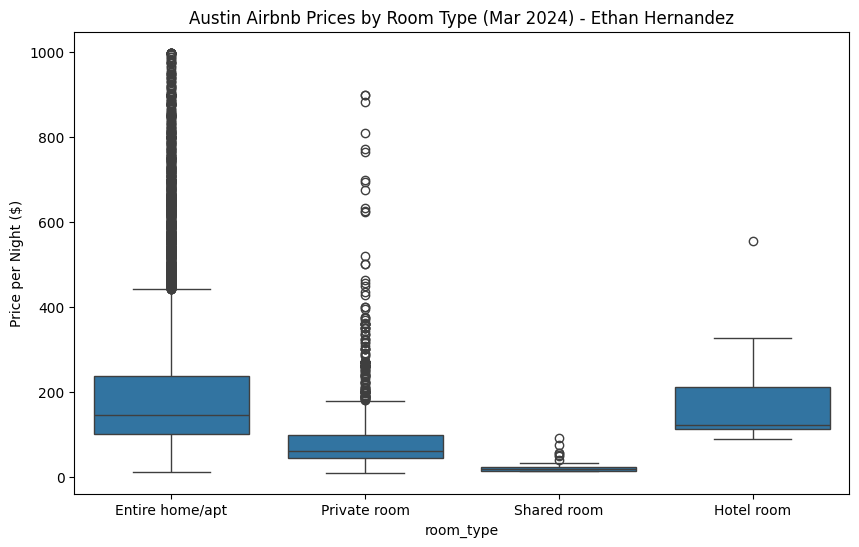

In [5]:
# AUSTIN HOTEL PRICE ANALYSIS - Ethan Hernandez
# Dataset: Airbnb Austin listings (public)
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load data from local file
df = pd.read_csv('listings.csv.gz', compression='gzip')

# Clean data
df = df[['name', 'neighbourhood', 'room_type', 'price', 'minimum_nights', 'availability_365']]
df['price'] = df['price'].replace('[$,]', '', regex=True).astype(float)
df = df[df['price'] < 1000]  # remove outliers

# Key insights
print(f"Average price: ${df['price'].mean():.0f}")
print(f"Most expensive neighborhood: {df.groupby('neighbourhood')['price'].mean().idxmax()}")

# Plot
plt.figure(figsize=(10,6))
sns.boxplot(x='room_type', y='price', data=df)
plt.title("Austin Airbnb Prices by Room Type (Mar 2024) - Ethan Hernandez")
plt.ylabel("Price per Night ($)")
plt.savefig("austin_price_plot.png")
plt.show()

# Finding: Entire home/apt avg $150+ vs Private room $75